In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('reviews.csv', names=['Game_ID', 'Num_Helpful', 'Num_Funny', 'Username', 'Num_Games_Owned', 'Num_Reviews_Written', 'Recommend', 'Hours_Played', 'Date_of_Review', 'Review_Text'])

In [3]:
dataset.head()

,Game_ID,Num_Helpful,Num_Funny,Username,Num_Games_Owned,Num_Reviews_Written,Recommend,Hours_Played,Date_of_Review,Review_Text
0,1168880,0,0,absolute_filth,245,7,1,21.5,"October 30, 2021","One of the slightly easier zach games, but wit..."
1,1168880,0,0,comrade-pingus-bunker,135,31,1,0.9,"October 17, 2021",I would really like to have one of these at home.
2,1168880,0,0,magikaru,467,28,1,2.2,"October 16, 2021",Another fantastic Zachtronics puzzle game.
3,1168880,0,0,Lightsockie,414,18,1,9.9,"October 10, 2021",addicting af
4,1168880,2,0,dux00,712,12,1,20.2,"July 29, 2021",Not quite as polished as the other Zachtronics...


In [4]:
dataset.columns

Index(['Game_ID', 'Num_Helpful', 'Num_Funny', 'Username', 'Num_Games_Owned',
       'Num_Reviews_Written', 'Recommend', 'Hours_Played', 'Date_of_Review',
       'Review_Text'],
      dtype='object')

In [5]:
# clean up uneeded columns
dataset.drop(labels = ['Game_ID', 'Username', 'Num_Games_Owned', 'Num_Reviews_Written'], axis=1, inplace=True)

In [6]:
dataset.head()

,Num_Helpful,Num_Funny,Recommend,Hours_Played,Date_of_Review,Review_Text
0,0,0,1,21.5,"October 30, 2021","One of the slightly easier zach games, but wit..."
1,0,0,1,0.9,"October 17, 2021",I would really like to have one of these at home.
2,0,0,1,2.2,"October 16, 2021",Another fantastic Zachtronics puzzle game.
3,0,0,1,9.9,"October 10, 2021",addicting af
4,2,0,1,20.2,"July 29, 2021",Not quite as polished as the other Zachtronics...


In [7]:
print(dataset.dtypes)

Num_Helpful         int64
Num_Funny           int64
Recommend           int64
Hours_Played      float64
Date_of_Review     object
Review_Text        object
dtype: object


In [8]:
# organize the columns so it would be easier to sort the features vs the output
df = dataset[['Date_of_Review', 'Review_Text', 'Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend']]
df.head(20)

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend
0,"October 30, 2021","One of the slightly easier zach games, but wit...",0,0,21.5,1
1,"October 17, 2021",I would really like to have one of these at home.,0,0,0.9,1
2,"October 16, 2021",Another fantastic Zachtronics puzzle game.,0,0,2.2,1
3,"October 10, 2021",addicting af,0,0,9.9,1
4,"July 29, 2021",Not quite as polished as the other Zachtronics...,2,0,20.2,1
5,"June 29, 2021",Симулятор фармацевта,4,0,0.7,1
6,"June 21, 2021",Loved previous titles from Zachtronics and whi...,3,0,12.3,1
7,"April 20, 2021",Another masterpiece from my favorite game comp...,1,0,24.6,1
8,"April 6, 2021",This is possibly the best Zachtronic game. All...,1,0,22.2,1
9,"March 14, 2021",I'm a big fan of the zachtronics style puzzle ...,2,0,9.8,-1


In [9]:
df.columns

Index(['Date_of_Review', 'Review_Text', 'Num_Helpful', 'Num_Funny',
       'Hours_Played', 'Recommend'],
      dtype='object')

# Convert date to datetime format

In [10]:
import datetime as dt

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date_of_Review  312 non-null    object 
 1   Review_Text     311 non-null    object 
 2   Num_Helpful     312 non-null    int64  
 3   Num_Funny       312 non-null    int64  
 4   Hours_Played    312 non-null    float64
 5   Recommend       312 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 14.8+ KB


In [12]:
# change date to unix datetime
dates = pd.to_datetime(df['Date_of_Review'])

# calculate unix datetime starting from 01-01-1970
df['Date_Epoch'] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

df.head()

C:\Users\anqiz\AppData\Local\Temp/ipykernel_24004/3723366679.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Epoch'] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')


,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch
0,"October 30, 2021","One of the slightly easier zach games, but wit...",0,0,21.5,1,1635552000
1,"October 17, 2021",I would really like to have one of these at home.,0,0,0.9,1,1634428800
2,"October 16, 2021",Another fantastic Zachtronics puzzle game.,0,0,2.2,1,1634342400
3,"October 10, 2021",addicting af,0,0,9.9,1,1633824000
4,"July 29, 2021",Not quite as polished as the other Zachtronics...,2,0,20.2,1,1627516800


In [13]:
# change the epoch time from total number of seconds into week number since(take the Date_Epoch and mod (b/c we want integers only) by num_secs_week = 7day/wk * 24hr/day * 60min/hr * 60sec/min = 604800)

df['Date_Epoch_Week'] = df['Date_Epoch'] // 604800

df.head()

C:\Users\anqiz\AppData\Local\Temp/ipykernel_24004/3335926905.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Epoch_Week'] = df['Date_Epoch'] // 604800


,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 30, 2021","One of the slightly easier zach games, but wit...",0,0,21.5,1,1635552000,2704
1,"October 17, 2021",I would really like to have one of these at home.,0,0,0.9,1,1634428800,2702
2,"October 16, 2021",Another fantastic Zachtronics puzzle game.,0,0,2.2,1,1634342400,2702
3,"October 10, 2021",addicting af,0,0,9.9,1,1633824000,2701
4,"July 29, 2021",Not quite as polished as the other Zachtronics...,2,0,20.2,1,1627516800,2691


In [14]:
df.sort_values(by=['Date_Epoch_Week'],ascending=True).groupby('Date_Epoch_Week')
df.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 30, 2021","One of the slightly easier zach games, but wit...",0,0,21.5,1,1635552000,2704
1,"October 17, 2021",I would really like to have one of these at home.,0,0,0.9,1,1634428800,2702
2,"October 16, 2021",Another fantastic Zachtronics puzzle game.,0,0,2.2,1,1634342400,2702
3,"October 10, 2021",addicting af,0,0,9.9,1,1633824000,2701
4,"July 29, 2021",Not quite as polished as the other Zachtronics...,2,0,20.2,1,1627516800,2691


## - Data Aggregation -

### Number of text reviews per day:

In [15]:
# reindex gets the columns needed
df_text = df.reindex(['Date_Epoch_Week','Date_of_Review', 'Review_Text'], axis=1)
df_text.head()
# formats to year-month datetime format
# df_text['Year_Month'] = pd.to_datetime(df_text['Year_Month'], format="%Y/%m")

,Date_Epoch_Week,Date_of_Review,Review_Text
0,2704,"October 30, 2021","One of the slightly easier zach games, but wit..."
1,2702,"October 17, 2021",I would really like to have one of these at home.
2,2702,"October 16, 2021",Another fantastic Zachtronics puzzle game.
3,2701,"October 10, 2021",addicting af
4,2691,"July 29, 2021",Not quite as polished as the other Zachtronics...


In [16]:

# groupby counts the total number of reviews per day
text_days = df_text.groupby(['Date_Epoch_Week', 'Date_of_Review']).size().reset_index().rename(columns={0: 'review_count'})
text_days

,Date_Epoch_Week,Date_of_Review,review_count
0,2600,"November 4, 2019",17
1,2600,"November 5, 2019",18
2,2600,"November 6, 2019",4
3,2601,"November 10, 2019",7
4,2601,"November 11, 2019",4
...,...,...,...
136,2691,"July 29, 2021",1
137,2701,"October 10, 2021",1
138,2702,"October 16, 2021",1
139,2702,"October 17, 2021",1


<AxesSubplot:>

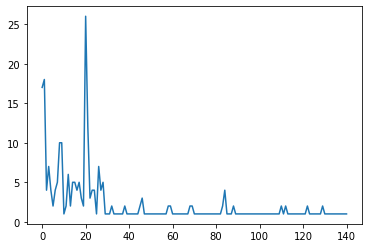

In [17]:
text_days['review_count'].plot()

In [18]:
# total number of text reviews
text_days['review_count'].sum()

312

In [19]:
# average number of text reviews per day
text_days['review_count'].mean()

2.2127659574468086

### Number of text reviews per week:

In [20]:
df_text = df.reindex(['Date_Epoch_Week','Review_Text'], axis=1)
text_weeks = df_text.groupby('Date_Epoch_Week').size().reset_index().rename(columns={0: 'review_count'})
text_weeks

,Date_Epoch_Week,review_count
0,2600,39
1,2601,42
2,2602,21
3,2603,52
4,2604,28
...,...,...
60,2686,1
61,2691,1
62,2701,1
63,2702,2


<AxesSubplot:>

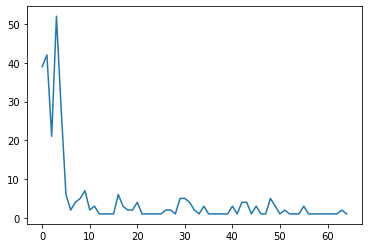

In [21]:
text_weeks['review_count'].plot()

In [22]:
# total number of text reviews
text_weeks['review_count'].sum()

312

In [23]:
# average number of text reviews per week
text_weeks['review_count'].mean()

4.8

### Num_Helpful per week:

In [24]:
df.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 30, 2021","One of the slightly easier zach games, but wit...",0,0,21.5,1,1635552000,2704
1,"October 17, 2021",I would really like to have one of these at home.,0,0,0.9,1,1634428800,2702
2,"October 16, 2021",Another fantastic Zachtronics puzzle game.,0,0,2.2,1,1634342400,2702
3,"October 10, 2021",addicting af,0,0,9.9,1,1633824000,2701
4,"July 29, 2021",Not quite as polished as the other Zachtronics...,2,0,20.2,1,1627516800,2691


In [25]:
df_helpful = df.reindex(['Date_Epoch_Week', 'Num_Helpful'], axis=1)
# total num of helpful votes per month (but keep in mind that helpful votes are for 1 review at a time)
df_helpful.groupby('Date_Epoch_Week').Num_Helpful.sum().reset_index().rename(columns={0: 'helpful_count'})


,Date_Epoch_Week,Num_Helpful
0,2600,387
1,2601,65
2,2602,76
3,2603,131
4,2604,24
...,...,...
60,2686,4
61,2691,2
62,2701,0
63,2702,0


In [26]:
df_helpful.groupby('Date_Epoch_Week').Num_Helpful.agg(['max', 'min', 'median', 'mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2600,90,0,1.0,9.923077
2601,22,0,0.0,1.547619
2602,38,0,0.0,3.619048
2603,33,0,0.0,2.519231
2604,8,0,0.0,0.857143
...,...,...,...,...
2686,4,4,4.0,4.000000
2691,2,2,2.0,2.000000
2701,0,0,0.0,0.000000


In [27]:
# total number of helpful votes of all users for all text reviews combined
df_helpful['Num_Helpful'].sum()

1200

In [28]:
# average number of helpful votes on all reviews by all users
df_helpful['Num_Helpful'].mean()

3.8461538461538463

### Num_Funny per week:

In [29]:
df_funny = df.reindex(['Date_Epoch_Week', 'Num_Funny'], axis=1)
# total num of helpful votes per month (but keep in mind that helpful votes are for 1 review at a time)
df_funny.groupby('Date_Epoch_Week').Num_Funny.sum().reset_index().rename(columns={0: 'funny_count'})

,Date_Epoch_Week,Num_Funny
0,2600,123
1,2601,2
2,2602,7
3,2603,74
4,2604,4
...,...,...
60,2686,0
61,2691,0
62,2701,0
63,2702,0


In [30]:
df_funny.groupby('Date_Epoch_Week').Num_Funny.agg(['max', 'min', 'median', 'mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2600,70,0,0.0,3.153846
2601,1,0,0.0,0.047619
2602,4,0,0.0,0.333333
2603,30,0,0.0,1.423077
2604,4,0,0.0,0.142857
...,...,...,...,...
2686,0,0,0.0,0.000000
2691,0,0,0.0,0.000000
2701,0,0,0.0,0.000000


In [31]:
# total number of funny votes of all users for all text reviews combined
df_funny['Num_Funny'].sum()

290

In [32]:
# average number of funny votes on all reviews by all users
df_funny['Num_Funny'].mean()

0.9294871794871795

### Hours_Played per week:

In [33]:
df_hrs_plyd = df.reindex(['Date_Epoch_Week','Hours_Played'], axis=1)

# total num of hours played of the game for each month for all reviewers
df_hrs_plyd.groupby('Date_Epoch_Week').Hours_Played.sum().reset_index().rename(columns={0: 'hrs_pld_count'})

,Date_Epoch_Week,Hours_Played
0,2600,309.2
1,2601,802.1
2,2602,220.3
3,2603,632.0
4,2604,549.1
...,...,...
60,2686,0.7
61,2691,20.2
62,2701,9.9
63,2702,3.1


In [34]:
df_hrs_plyd.groupby('Date_Epoch_Week').Hours_Played.agg(['max','min','median','mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2600,42.7,0.1,5.60,7.928205
2601,77.6,0.3,8.90,19.097619
2602,26.8,1.0,8.60,10.490476
2603,59.4,0.5,7.30,12.153846
2604,117.9,0.5,9.25,19.610714
...,...,...,...,...
2686,0.7,0.7,0.70,0.700000
2691,20.2,20.2,20.20,20.200000
2701,9.9,9.9,9.90,9.900000


In [35]:
# total number of hours played of the game by all users
df_hrs_plyd['Hours_Played'].sum()

4622.2

In [36]:
# average number of hours played of the game by all users
df_hrs_plyd['Hours_Played'].mean()

14.814743589743584

### Recommend per week:

In [37]:
df_recmd = df.reindex(['Date_Epoch_Week','Recommend'], axis=1)

# avgerage number of reviewers recommended(1) + not recommended(-1) the game after writing the review for each week
df_recmd.groupby('Date_Epoch_Week',).Recommend.mean().reset_index().rename(columns={0: 'recmd_count'})

,Date_Epoch_Week,Recommend
0,2600,0.948718
1,2601,0.904762
2,2602,0.904762
3,2603,0.923077
4,2604,0.928571
...,...,...
60,2686,1.000000
61,2691,1.000000
62,2701,1.000000
63,2702,1.000000


In [38]:
df_recmd.groupby('Date_Epoch_Week').Recommend.agg(['max','min','median','mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2600,1,-1,1.0,0.948718
2601,1,-1,1.0,0.904762
2602,1,-1,1.0,0.904762
2603,1,-1,1.0,0.923077
2604,1,-1,1.0,0.928571
...,...,...,...,...
2686,1,1,1.0,1.000000
2691,1,1,1.0,1.000000
2701,1,1,1.0,1.000000


In [39]:
# total number of users who recommend the game
df_recmd['Recommend'].sum()

266

In [40]:
# average score of recommend/not recommend by all users
df_recmd['Recommend'].mean()

0.8525641025641025

## Feature Scaling - Min-Max Normalization

In [41]:
df_min_max_scaled = df.copy()

In [42]:
df_min_max_scaled.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 30, 2021","One of the slightly easier zach games, but wit...",0,0,21.5,1,1635552000,2704
1,"October 17, 2021",I would really like to have one of these at home.,0,0,0.9,1,1634428800,2702
2,"October 16, 2021",Another fantastic Zachtronics puzzle game.,0,0,2.2,1,1634342400,2702
3,"October 10, 2021",addicting af,0,0,9.9,1,1633824000,2701
4,"July 29, 2021",Not quite as polished as the other Zachtronics...,2,0,20.2,1,1627516800,2691


In [43]:
#df_min_max_scaled['Num_Helpful'] = (df_min_max_scaled['Num_Helpful'] - df_min_max_scaled['Num_Helpful'].min()) / (df_min_max_scaled['Num_Helpful'].max() - df_min_max_scaled['Num_Helpful'].min())
#df_min_max_scaled['Hours_Played'] = (df_min_max_scaled['Hours_Played'] - df_min_max_scaled['Hours_Played'].min()) / (df_min_max_scaled['Hours_Played'].max() - df_min_max_scaled['Hours_Played'].min()) 
df_min_max_scaled['Hours_Played'] = (df_min_max_scaled['Hours_Played'] - df_min_max_scaled['Hours_Played'].min()) / (df_min_max_scaled['Hours_Played'].max() - df_min_max_scaled['Hours_Played'].min()) 
df_min_max_scaled['Recommend'] = (df_min_max_scaled['Recommend'] - df_min_max_scaled['Recommend'].min()) / (df_min_max_scaled['Recommend'].max() - df_min_max_scaled['Recommend'].min()) 
df_min_max_scaled['Date_Epoch'] = (df_min_max_scaled['Date_Epoch'] - df_min_max_scaled['Date_Epoch'].min()) / (df_min_max_scaled['Date_Epoch'].max() - df_min_max_scaled['Date_Epoch'].min()) 
#df_min_max_scaled['Date_Epoch_Week'] = (df_min_max_scaled['Date_Epoch_Week'] - df_min_max_scaled['Date_Epoch_Week'].min()) / (df_min_max_scaled['Date_Epoch_Week'].max() - df_min_max_scaled['Date_Epoch_Week'].min()) 

display(df_min_max_scaled)

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 30, 2021","One of the slightly easier zach games, but wit...",0,0,0.181664,1.0,1.000000,2704
1,"October 17, 2021",I would really like to have one of these at home.,0,0,0.006791,1.0,0.982094,2702
2,"October 16, 2021",Another fantastic Zachtronics puzzle game.,0,0,0.017827,1.0,0.980716,2702
3,"October 10, 2021",addicting af,0,0,0.083192,1.0,0.972452,2701
4,"July 29, 2021",Not quite as polished as the other Zachtronics...,2,0,0.170628,1.0,0.871901,2691
...,...,...,...,...,...,...,...,...
307,"November 26, 2019",I've always wanted to be an angry Romanian che...,0,0,0.051783,1.0,0.030303,2603
308,"November 26, 2019",Absolutely fantastic.,0,0,0.044992,1.0,0.030303,2603
309,"November 26, 2019","Gr8 game, 8/8",0,0,0.337861,1.0,0.030303,2603
310,"November 25, 2019","Happy now. As long as Magnet isn't running, t...",0,0,0.012733,1.0,0.028926,2603


In [44]:
df_sorted = df_min_max_scaled.sort_values(by='Date_Epoch', ascending=False)

In [45]:
pd.set_option('display.max_rows', None)

In [46]:
df_sorted = df_sorted.reset_index(drop=True)

In [47]:
# drop all n/a data
clean_df=df.drop(df[df['Review_Text'].isna()].index, inplace=True)
cat_df=df.drop(df[df['Recommend'].isna()].index, inplace=True)

C:\Users\anqiz\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [48]:
# delete Chinese characters in text reviews
df_sorted['Review_Text'] = df_sorted['Review_Text'].str.replace(r'[^\x00-\x7F]+', '')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_24004/2491715762.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_sorted['Review_Text'] = df_sorted['Review_Text'].str.replace(r'[^\x00-\x7F]+', '')


In [49]:
df_sorted

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 30, 2021","One of the slightly easier zach games, but wit...",0,0,0.181664,1.0,1.000000,2704
1,"October 17, 2021",I would really like to have one of these at home.,0,0,0.006791,1.0,0.982094,2702
2,"October 16, 2021",Another fantastic Zachtronics puzzle game.,0,0,0.017827,1.0,0.980716,2702
3,"October 10, 2021",addicting af,0,0,0.083192,1.0,0.972452,2701
4,"July 29, 2021",Not quite as polished as the other Zachtronics...,2,0,0.170628,1.0,0.871901,2691
5,"June 29, 2021",,4,0,0.005093,1.0,0.830579,2686
6,"June 21, 2021",Loved previous titles from Zachtronics and whi...,3,0,0.103565,1.0,0.819559,2685
7,"April 20, 2021",Another masterpiece from my favorite game comp...,1,0,0.207980,1.0,0.734160,2676
8,"April 6, 2021",This is possibly the best Zachtronic game. All...,1,0,0.187606,1.0,0.714876,2674
9,"March 14, 2021",I'm a big fan of the zachtronics style puzzle ...,2,0,0.082343,0.0,0.683196,2671


In [50]:
# sorted review text
df_text_list = df_sorted.groupby('Date_Epoch_Week')['Review_Text'].apply(list) # save separately as json file

In [51]:
df_text_list

Date_Epoch_Week
2600    [This game is pleasantly accurate to real-worl...
2601    [amazing game. similar to opus magnum, If you ...
2602    [Zachtronix is one of very few companies on my...
2603    [more smooth than previous chemical games from...
2604    [Brain-melt-simulator-melt-brain-brain-simulat...
2605    [a good Zachtronics game. very Opus Magnum-lik...
2606    [Still a good game like any Zachtronics game, ...
2607    [Thanks for showing me how clueless I can be w...
2608    [As someone studying chemistry, this is an unb...
2609    [Really interesting quasi-chemistry puzzle-gam...
2610    [please bring adderall, or conveniently synthe...
2612    [I'm a simple man.  I see a new Zachtronics ga...
2613    [A great way to train problem-solving and opti...
2614            [buy if you like other Zachtronics games]
2615    [No, this actually feels like work. There's no...
2616                                                [yes]
2618    [Nothing will ever take the place of SpaceChem..

In [52]:
# storing data in JSON format
df_text_list.to_json('moleksyntez_text.json', orient = 'split', compression = 'infer')

In [53]:
# reading the JSON file
game_text = pd.read_json('moleksyntez_text.json')
print(game_text)

           name  index                                               data
0   Review_Text   2600  [This game is pleasantly accurate to real-worl...
1   Review_Text   2601  [amazing game. similar to opus magnum, If you ...
2   Review_Text   2602  [Zachtronix is one of very few companies on my...
3   Review_Text   2603  [more smooth than previous chemical games from...
4   Review_Text   2604  [Brain-melt-simulator-melt-brain-brain-simulat...
5   Review_Text   2605  [a good Zachtronics game. very Opus Magnum-lik...
6   Review_Text   2606  [Still a good game like any Zachtronics game, ...
7   Review_Text   2607  [Thanks for showing me how clueless I can be w...
8   Review_Text   2608  [As someone studying chemistry, this is an unb...
9   Review_Text   2609  [Really interesting quasi-chemistry puzzle-gam...
10  Review_Text   2610  [please bring adderall, or conveniently synthe...
11  Review_Text   2612  [I'm a simple man.  I see a new Zachtronics ga...
12  Review_Text   2613  [A great way t

In [54]:
# mean of other columns; save as csv file
mean_per_week = df_sorted.groupby('Date_Epoch_Week')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for weekly
mean_per_week.to_csv('moleksyntez_mean_week.csv')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_24004/2729804984.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_per_week = df_sorted.groupby('Date_Epoch_Week')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for weekly


In [55]:
mean_day = df_sorted.groupby('Date_Epoch')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for daily
mean_day.to_csv('moleksyntez_mean_day.csv')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_24004/2674595549.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_day = df_sorted.groupby('Date_Epoch')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for daily


In [56]:
# storing data in CSV format
game_review = df_sorted.to_csv('moleksyntez_review.csv', columns=['Date_Epoch_Week', 'Review_Text'])